## Image Resize

In [3]:
#!/usr/bin/python
from PIL import Image
import os, sys

path = "C:/Users/JeanMichel/imgTester/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((224,224), Image.ANTIALIAS)
            imResize.save(path + 'resized/'+ item , 'JPEG', quality=90)

resize()

## Package Import & Image Loading

In [9]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt

fps = glob.glob("C:/Users/JeanMichel/imgTester/resized/*.jpg")

images = np.array(
    [cv2.cvtColor(cv2.imread(fp), cv2.COLOR_BGR2RGB) for fp in fps], # image batch size fps 크기로 조정
    dtype = np.uint8
)
print(images.shape)

(27, 224, 224, 3)


## Define Augmenter 

### case 1 ) Crop, Flip, GaussianBlur

In [11]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

images_aug = seq(images=images)
print(images_aug.shape)

(27, 224, 224, 3)


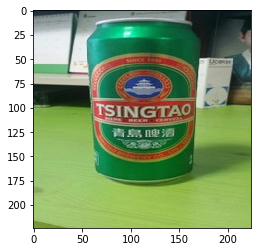

In [12]:
plt.imshow(images[0])

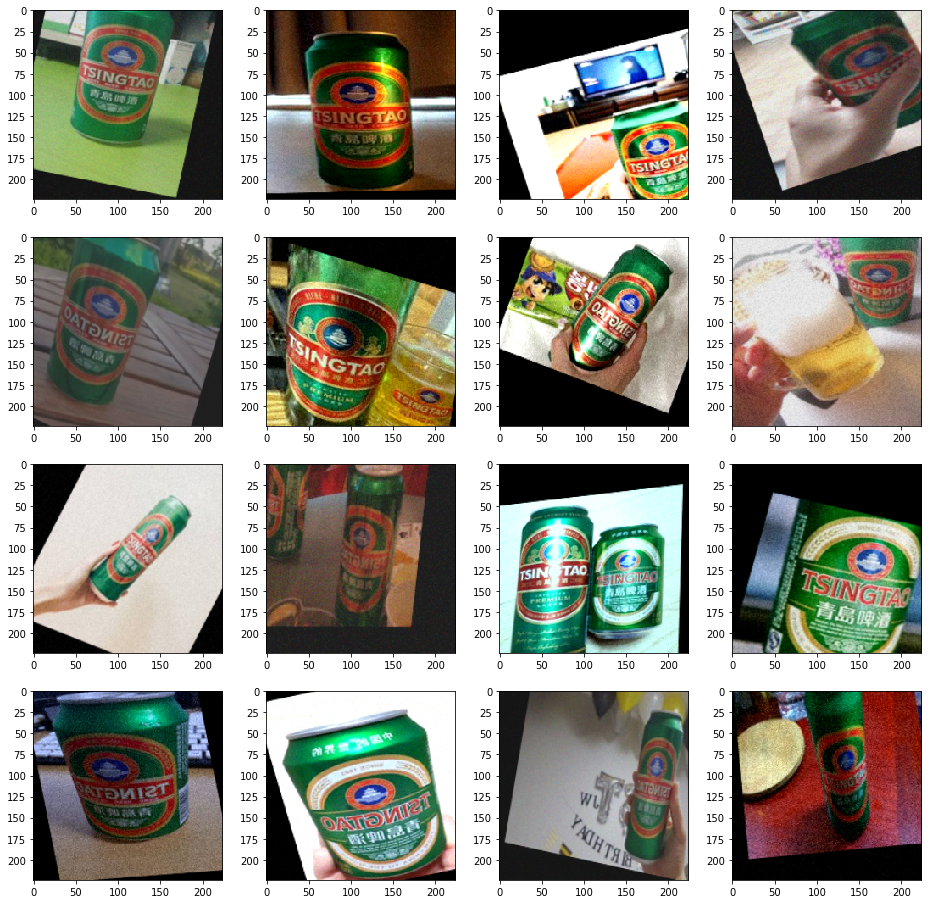

In [18]:
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = images_aug[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### case 2) Flip, Crop, GaussianBlur, Contrast, Gaussian noise, Ligteness, Affine ( rigbody transform + shear )

In [19]:
import imgaug.augmenters as iaa

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    iaa.Sometimes(0.5, # gaussian blur with random sigma 0~0.5 in half of images
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    iaa.ContrastNormalization((0.75, 1.5)),# Strengthen or weaken the contrast in each image.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),    # Add gaussian noise.
    iaa.Multiply((0.8, 1.2), per_channel=0.2), # configure lighteness
    iaa.Affine(    # Affine Transform : Scale/zoom them, translate/move them, rotate them and shear them.
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)

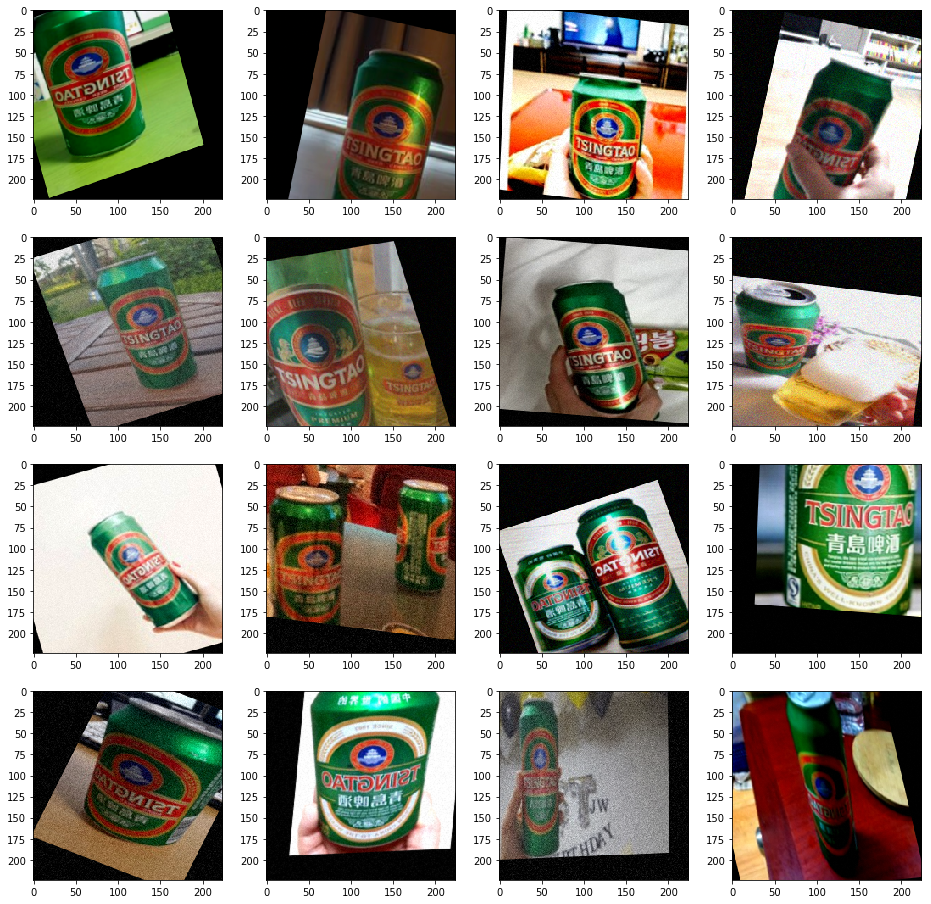

In [20]:
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = images_aug[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## Save augmented images

In [52]:
from PIL import Image
import os, sys

path = "C:/Users/JeanMichel/imgTester/Augmented/"
def saveImages():
    i=0
    for img in images_aug:
        cv2.imwrite(os.path.join(path , os.path.basename(fps[i])), cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        i+=1
        
saveImages()

In [27]:
images_aug.shape

(27, 224, 224, 3)

In [ ]:
for batch_idx in range(1000):
    # 'images' should be either a 4D numpy array of shape (N, height, width, channels)
    # or a list of 3D numpy arrays, each having shape (height, width, channels).
    # Grayscale images must have shape (height, width, 1) each.
    # All images must have numpy's dtype uint8. Values are expected to be in
    # range 0-255.
    images = load_batch(batch_idx)
    images_aug = seq(images=images)
    train_on_images(images_aug)